In [1]:
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


def convert_to_DF(data):
    x = []
    for data_set in data:
        x.append(data_set.array(library="np"))
    
    col_name = []
    for name in data.typenames():
        col_name.append(name)

    return pd.DataFrame(np.transpose(x), columns=col_name)
    #np.transpose(x) because x.shape = (166 2700) was the wrong way round 


def drop_null(data):
    for index, value in enumerate(data["B_sig_isSignalAcceptMissingNeutrino"]):
        if value == 0:
            data.drop(index, inplace=True)



data_0_005  = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_0_005_GeV_10000_events_nobdtcut.root:tree_Bsig;1")
data_3_0    = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_3_GeV_10000_events_nobdtcut.root:tree_Bsig;1")
data_4_6    = uproot.open("/ceph/aavocone/Data/processed_simulation_B_K_a_nunu_ma_4_6_GeV_10000_events_nobdtcut.root:tree_Bsig;1")

index = ["B_sig_K_pt","B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE","foxWolframR1","harmonicMomentThrust0", "thrustAxisCosTheta","aplanarity","sphericity"]
x_axis = ["$p_T(K) \: (GeV/c)$","$dr_K \: (\mu m)$","$dz_K \: (\mu m)$","CLEO Cone 3","Fox-Wolfram Moment 1","Harmonic Moment $H_0$", "Thrust Axis $cos(\Theta_K)$","aplanarity","sphericity"]


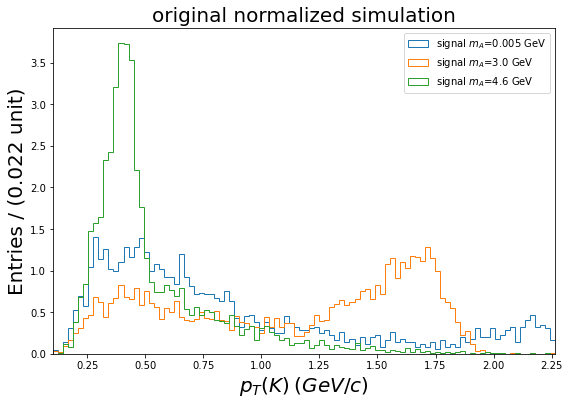

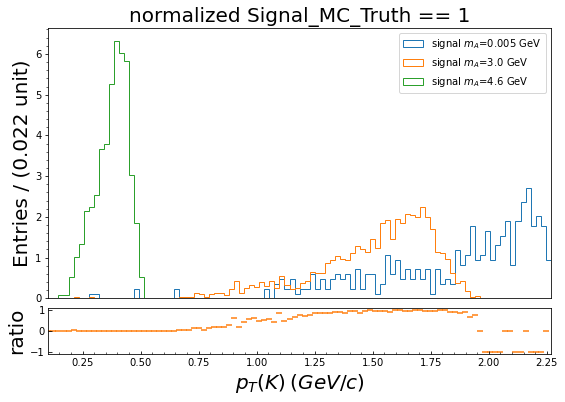

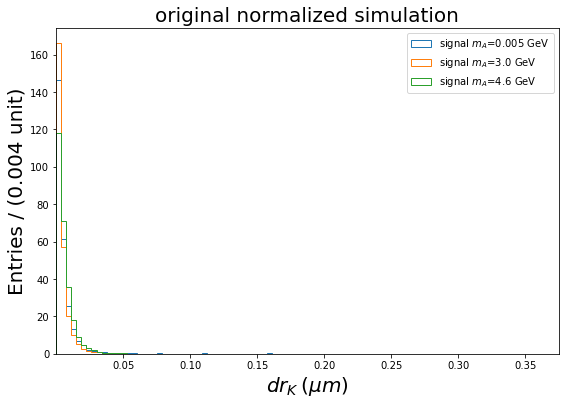

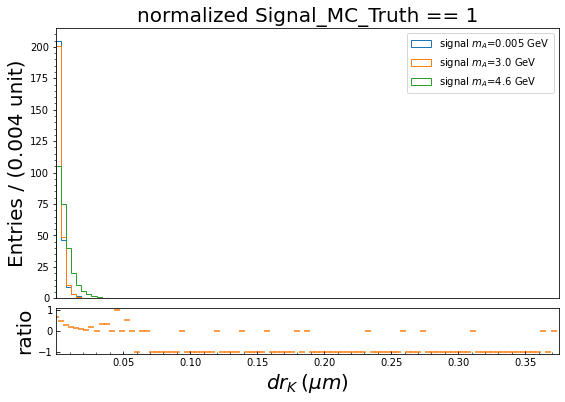

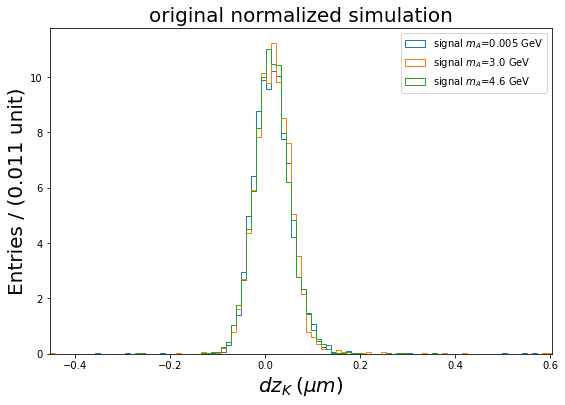

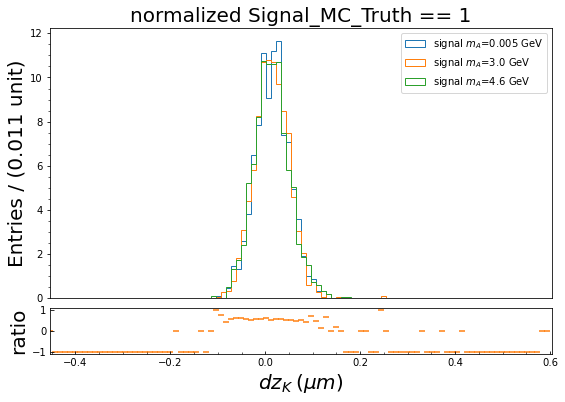

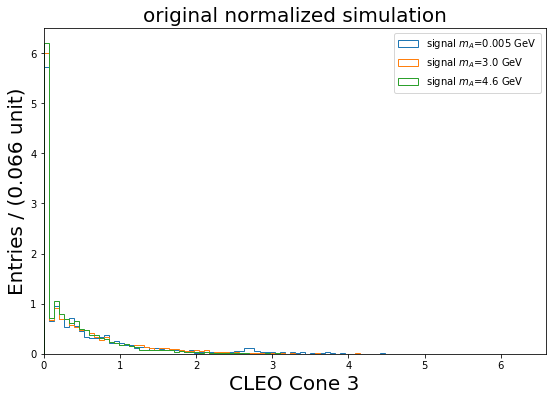

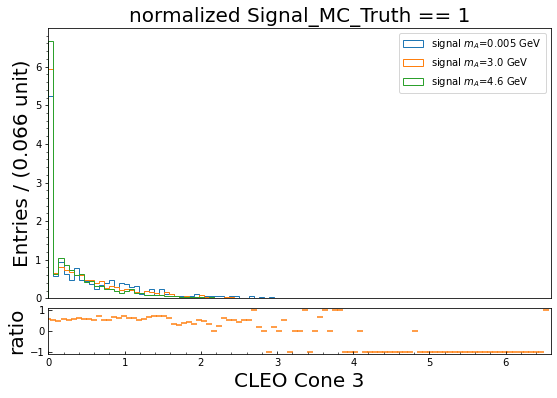

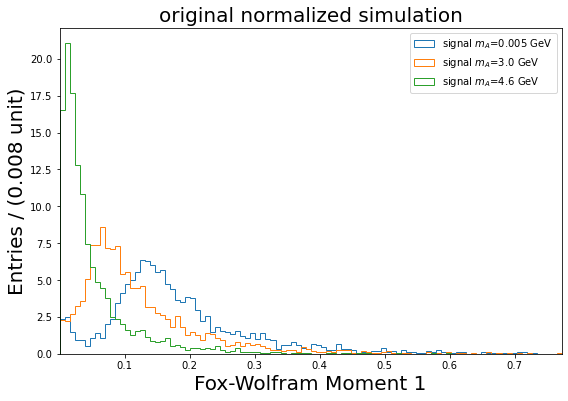

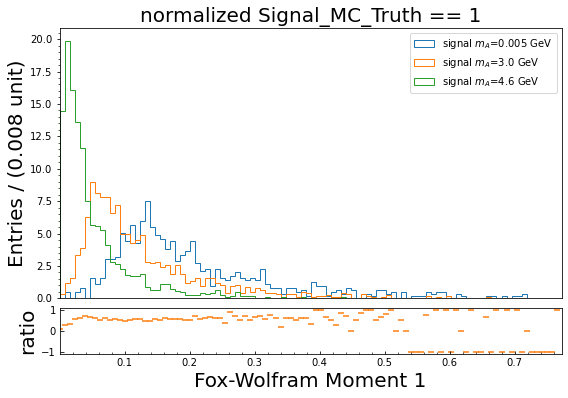

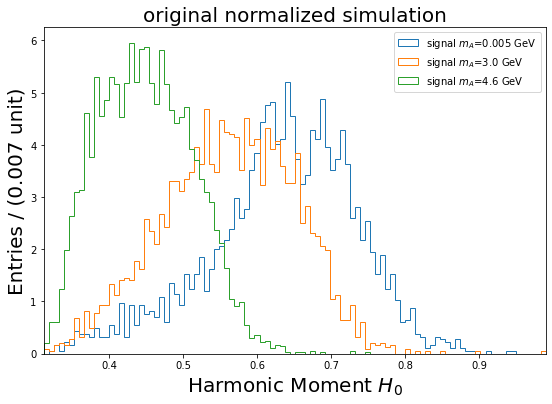

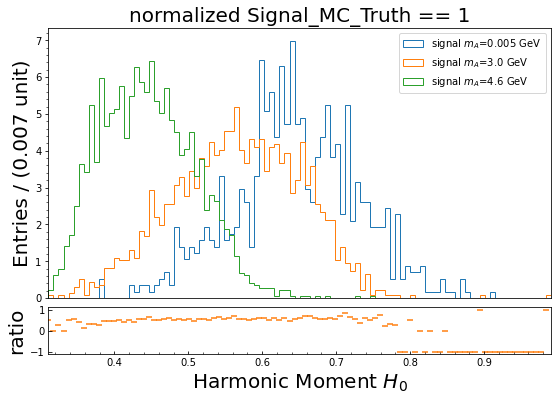

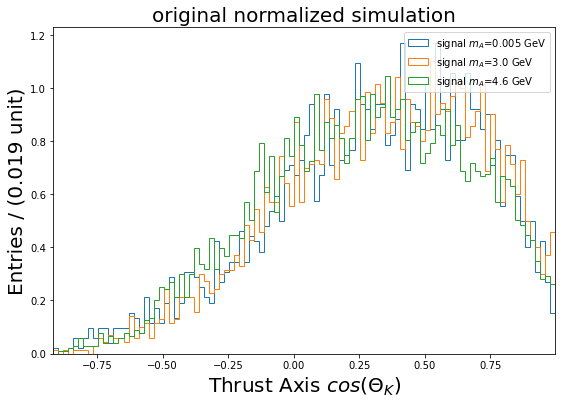

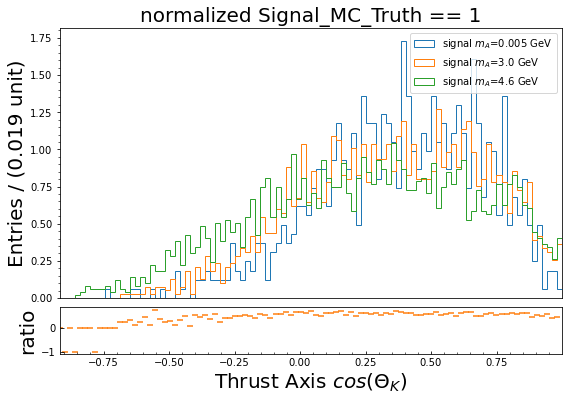

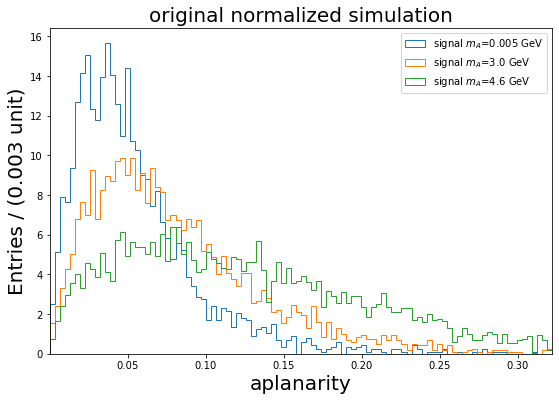

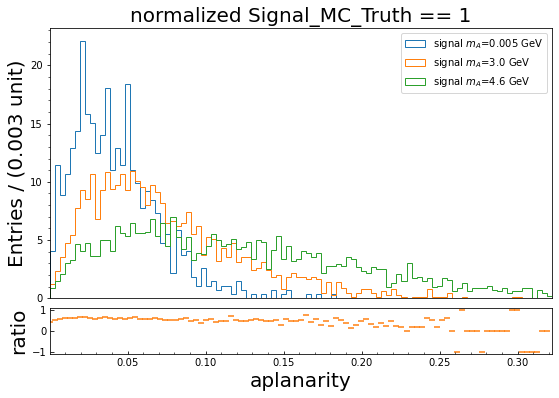

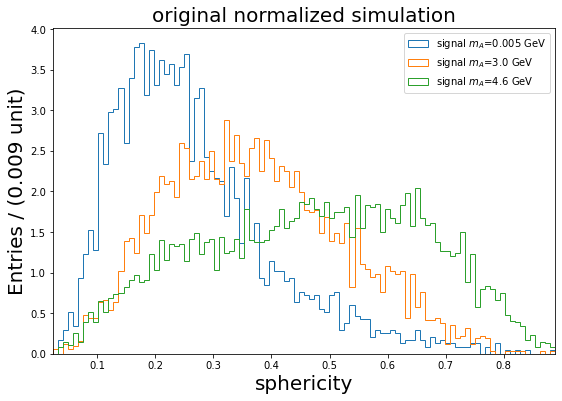

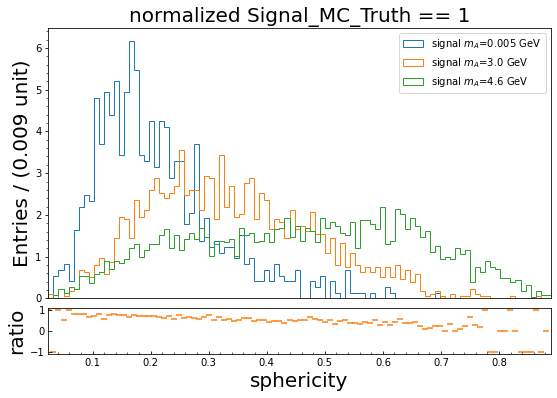

In [24]:
df_0_005 = convert_to_DF(data_0_005)
df_3_0 = convert_to_DF(data_3_0)
df_4_6 = convert_to_DF(data_4_6)

drop_null(df_0_005)
drop_null(df_3_0)
drop_null(df_4_6)


for i,names in enumerate(index):

    #get bins and counts
    counts0, bin_edges  = np.histogram(data_3_0[names].array(library="np"), bins = 100)
    

    counts1, b          = np.histogram(df_3_0[names], bins = bin_edges)



        #get the ratio. if x/0 --> -1
    ratio = []
    for x,y in zip(counts1,counts0):
        if y == 0:
            ratio.append(-1)
        else:
            ratio.append(x/y)



#------------------------------------------------plot original ----------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------



    plt.figure(figsize=(9,6))
    plt.hist(data_0_005[names].array(), density = True, histtype="step", label="signal $m_A$=0.005 GeV", bins = bin_edges)
    plt.hist(data_3_0[names].array(), density = True, histtype="step", label="signal $m_A$=3.0 GeV", bins = b)
    plt.hist(data_4_6[names].array(), density = True, histtype="step", label="signal $m_A$=4.6 GeV", bins = b)
    plt.ylabel("Entries / ({:.3f} unit)".format(b[1]-b[0]), fontsize = 20)
    plt.xlabel(x_axis[i], fontsize = 20)
    plt.title("original normalized simulation", fontsize = 20)
    plt.legend()
    plt.xlim(min(b),max(b))
    plt.savefig("/work/aavocone/week2/Presentation/" + names + "0.jpeg")
    plt.show() 


#------------------------------------------------plot graphic part--------------------------------------------------------------------------------


    #create grid
    fig = plt.figure(figsize=(9,6))
    gspec = fig.add_gridspec(6,1)

    #define position ax0 = 1-6 ax1 = 6
    ax0 = fig.add_subplot(gspec[:-1,:])
    ax1 = fig.add_subplot(gspec[-1,:])

    #hist-plot
    ax0.hist(df_0_005[names], density = True, histtype="step", label="signal $m_A$=0.005 GeV", bins = b)
    ax0.hist(df_3_0[names], density = True, histtype="step", label="signal $m_A$=3.0 GeV", bins = b)
    ax0.hist(df_4_6[names], density = True, histtype="step", label="signal $m_A$=4.6 GeV", bins = b)
    ax0.set_ylabel("Entries / ({:.3f} unit)".format(b[1]-b[0]), fontsize = 20)
    ax0.set_title("normalized Signal_MC_Truth == 1", fontsize = 20)
    ax0.set_xlim(min(b),max(b))
    ax0.legend()
    






    #ratio-plot
    ax1.scatter(b[:-1],ratio, marker="_", color = "tab:orange")      # b[:,-1] because b = 201 elements but ratio = 200 elements
    ax1.set_ylabel("ratio",fontsize = 20)

#------------------------------------------------plot graphic part--------------------------------------------------------------------------------
    #setting minor ticks
    ax0.yaxis.set_minor_locator(AutoMinorLocator()) 
    ax1.xaxis.set_minor_locator(AutoMinorLocator())

    #remove x-ticks from ax0
    ax0.xaxis.set_visible(False)
    #setting ticks inside
    ax1.tick_params(
    axis ="both", 
    direction = "in",
    which = "both"                       # remove label and ticks
    )


#------------------------------------------------plot graphic part--------------------------------------------------------------------------------

    #doesnt matter if ax0 or ax1 so plt
    plt.xlabel(x_axis[i], fontsize = 20)
    ax1.set_xlim(min(b),max(b))
    plt.savefig("/work/aavocone/week2/Presentation/" + names + "1.jpeg")
    plt.show()


## Stacked Histogram

In [12]:
charged     = uproot.open('/ceph/aavocone/Data/forAlex/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16812_small.root:tree_Bsig;1')
mixed       = uproot.open('/ceph/aavocone/Data/forAlex/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16817_small.root:tree_Bsig;1')
uu          = uproot.open('/ceph/aavocone/Data/forAlex/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16802_small.root:tree_Bsig;1')
cc          = uproot.open('/ceph/aavocone/Data/forAlex/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16792_small.root:tree_Bsig;1')
dd         = uproot.open('/ceph/aavocone/Data/forAlex/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16797_small.root:tree_Bsig;1')
ss         = uproot.open('/ceph/aavocone/Data/forAlex/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16807_small.root:tree_Bsig;1')
#tt         = uproot.open('/ceph/aavocone/Data/forAlex/kplus_v34_kshort_v34_100invfb_test_nobdtcut_16717_small.root:tree_Bsig;1')

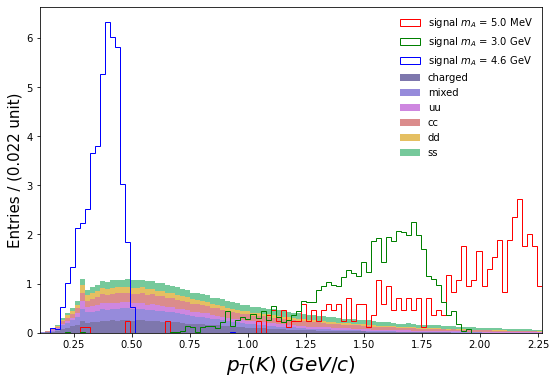

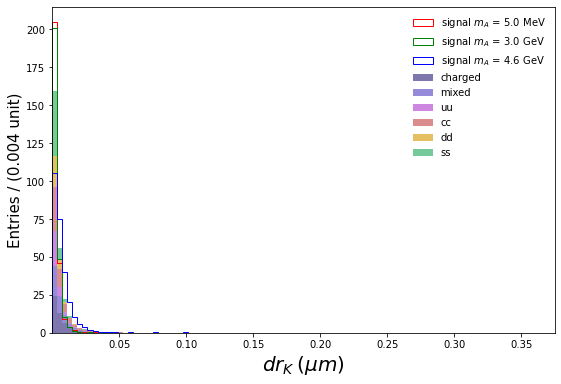

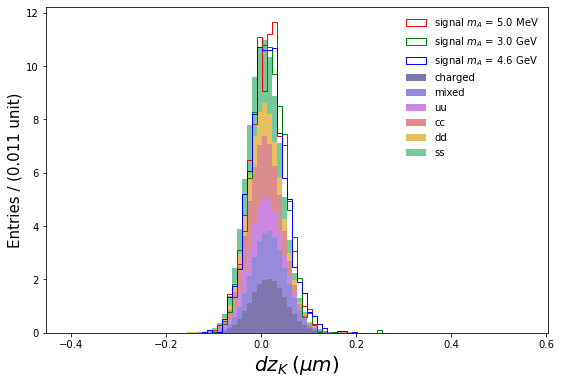

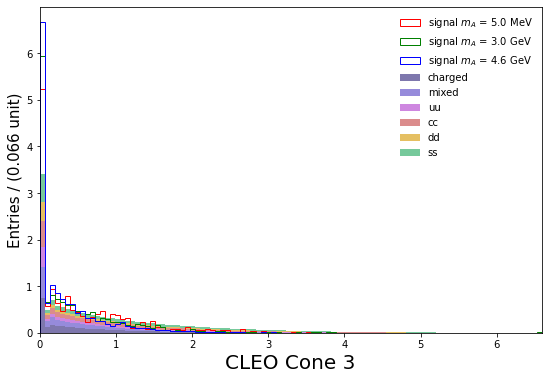

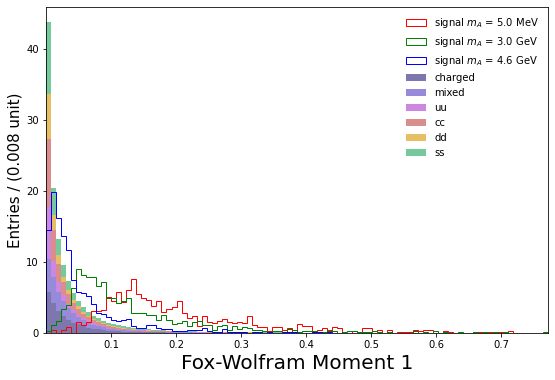

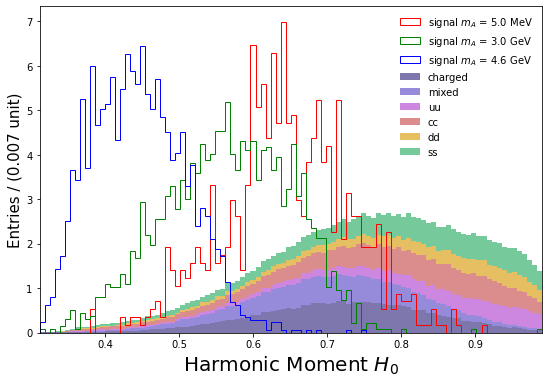

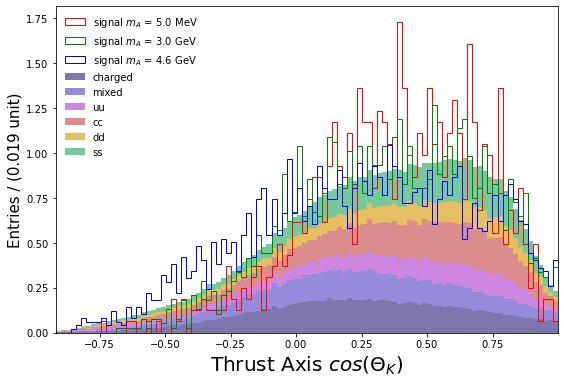

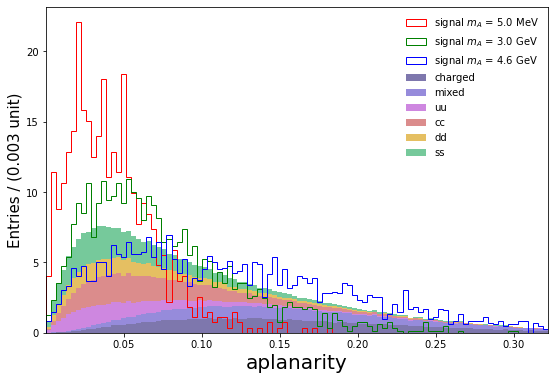

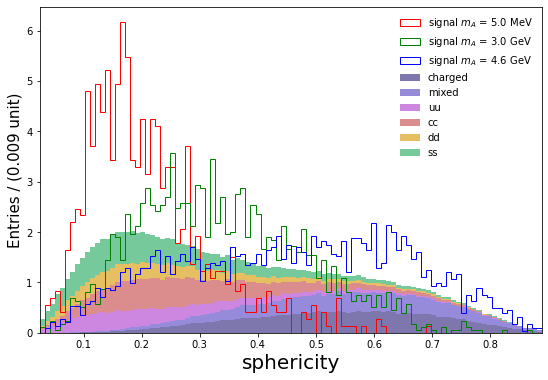

In [46]:
c_name = "B_sig_K_pt"
labels = ("charged", "mixed","uu","cc","dd","ss","tt")
colors = ("darkslateblue","slateblue","mediumorchid","indianred","goldenrod","mediumseagreen") #try cubehelix
background = [charged, mixed, uu, cc, dd, ss]
legend_location = [1,1,1,1,1,1,2,1,1]

for ii,names in enumerate(index):

    #get bins and counts
    counts0, b  = np.histogram(data_3_0[names].array(library="np"), bins = 100)


    #get background
    stacked_hist = []
    for signal in background:
        stacked_hist.append(signal[names].array(library="np"))


    plt.figure(figsize=(9,6))
    count,edge,bins = plt.hist(df_0_005[names], histtype="step", density=True, bins = b, label = "signal $m_A$ = 5.0 MeV", color="red")
    plt.hist(df_3_0[names], histtype="step", density=True, bins = b, label = "signal $m_A$ = 3.0 GeV", color="green")
    plt.hist(df_4_6[names], histtype="step", density=True, bins = b, label = "signal $m_A$ = 4.6 GeV", color="blue")
    plt.hist(stacked_hist, stacked = True, density=True, bins = edge, label = labels, alpha = 0.7, color = colors)
    plt.xlabel(x_axis[ii], fontsize=20)
    plt.ylabel("Entries / ({:.3f} unit)".format(edge[1]-edge[0]), fontsize = 15)
    #plt.title("Stacked normalized histogramm against $m_A = 0.005 GeV$", fontsize = 15)
    plt.legend(frameon=False,loc = legend_location[ii])
    plt.xlim(min(b),max(b))
    plt.savefig("/work/aavocone/week2/Presentation/" + names + "3.jpeg")
    plt.show() 


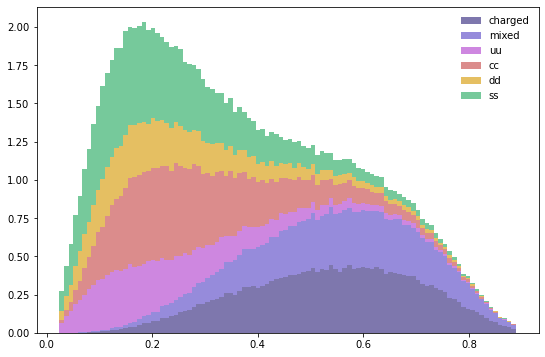

In [54]:
c = "sphericity"
stacked_hist = []
for signal in background:
    stacked_hist.append(signal[c].array(library="np"))


plt.figure(figsize=(9,6))

plt.hist(stacked_hist, stacked = True, density=True, bins = edge, label = labels, alpha = 0.7, color = colors)
#plt.xlabel("harmonic Moment", fontsize=20)
#plt.ylabel("Entries / ({:.3f} unit)".format(edge[1]-edge[0]), fontsize = 15)
#plt.title("Stacked normalized histogramm against $m_A = 0.005 GeV$", fontsize = 15)
plt.legend(frameon=False,loc = 1)
#plt.xlim(min(b),max(b))
plt.savefig("/work/aavocone/week2/Presentation/background.jpeg")
plt.show() 
